In [24]:
# 第一个单元格：导入库和环境设置
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 环境设置完成")

✅ 环境设置完成


In [25]:
# 第二个单元格：导入数据适配器（复用02中的设计）
class DataAdapter:
    def __init__(self, use_real_data=True, data_path=None):
        self.use_real_data = use_real_data
        self.data_path = data_path
        
    def load_data(self):
        """加载数据 - 统一接口"""
        if self.use_real_data and self.data_path:
            return self._load_real_data()
        else:
            return self._load_sample_data()
    
    def _load_real_data(self):
        """加载真实数据"""
        try:
            df = pd.read_csv(self.data_path)
            print(f"✅ 成功加载真实数据: {len(df)} 条记录")
            return self._standardize_data(df)
        except Exception as e:
            print(f"❌ 真实数据加载失败: {e}")
            return self._load_sample_data()
    
    def _load_sample_data(self):
        """加载样本数据（备用）"""
        try:
            df = pd.read_csv('../data/raw/sample_papers.csv')
            print(f"✅ 成功加载样本数据: {len(df)} 条记录")
            return df
        except:
            print("❌ 样本数据加载失败，使用最小测试数据")
            return self._load_minimal_test_data()
    
    def _standardize_data(self, df):
        """数据标准化"""
        # 确保必要列存在
        required_columns = ['title', 'abstract', 'journal', 'year']
        for col in required_columns:
            if col not in df.columns:
                print(f"⚠️ 警告: 缺少列 '{col}'")
        
        # 填充缺失值
        if 'citation_count' not in df.columns:
            df['citation_count'] = 0
        if 'reference_count' not in df.columns:
            df['reference_count'] = 30
            
        return df
    
    def _load_minimal_test_data(self):
        """最小测试数据"""
        return pd.DataFrame({
            'title': ['Test Paper'],
            'abstract': ['This is a test paper.'],
            'journal': ['Test Journal'],
            'year': [2023]
        })

print("✅ 数据适配器就绪")

✅ 数据适配器就绪


In [26]:
# 第三个单元格：加载数据并生成清洗后数据
print("📥 加载原始数据...")

# 优先尝试加载真实数据
adapter = DataAdapter(use_real_data=True, data_path='../data/raw/arxiv_ai_papers.csv')
raw_df = adapter.load_data()

print(f"\n📊 原始数据概览:")
print(f"数据集形状: {raw_df.shape}")
print(f"时间范围: {raw_df['year'].min()} - {raw_df['year'].max()}")
print(f"期刊数量: {raw_df['journal'].nunique()}")

# 数据清洗步骤
print("\n🧹 数据清洗中...")
cleaned_df = raw_df.copy()

# 1. 处理缺失值
if 'abstract' in cleaned_df.columns:
    cleaned_df['abstract'] = cleaned_df['abstract'].fillna('')
    
# 2. 处理年份数据
cleaned_df['year'] = pd.to_numeric(cleaned_df['year'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['year'])

# 3. 确保必要列存在
required_cols = ['title', 'abstract', 'journal', 'year']
for col in required_cols:
    if col not in cleaned_df.columns:
        cleaned_df[col] = f'default_{col}'

# 4. 保存清洗后数据
os.makedirs('../data/cleaned', exist_ok=True)
cleaned_file_path = '../data/cleaned/cleaned_papers.csv'
cleaned_df.to_csv(cleaned_file_path, index=False, encoding='utf-8')

print(f"✅ 清洗后数据已保存: {cleaned_file_path}")
print(f"清洗后数据形状: {cleaned_df.shape}")
print(f"有效数据: {len(cleaned_df)} 条")

# 为后续分析设置df变量
df = cleaned_df

print("\n前3行清洗后数据:")
df.head(3)

📥 加载原始数据...
✅ 成功加载真实数据: 250 条记录

📊 原始数据概览:
数据集形状: (250, 10)
时间范围: 2025 - 2025
期刊数量: 1

🧹 数据清洗中...
✅ 清洗后数据已保存: ../data/cleaned/cleaned_papers.csv
清洗后数据形状: (250, 10)
有效数据: 250 条

前3行清洗后数据:


,id,title,abstract,authors,journal,year,published_date,categories,citation_count,reference_count
0,2511.07419v1,Routing Manifold Alignment Improves Generaliza...,Sparse Mixture-of-Experts (MoE) have been wide...,"Zhongyang Li, Ziyue Li, Tianyi Zhou",arXiv,2025,2025-11-10 18:59:53+00:00,cs.LG,0,30
1,2511.07417v1,Language Generation with Infinite Contamination,"We study language generation in the limit, whe...","Anay Mehrotra, Grigoris Velegkas, Xifan Yu, Fe...",arXiv,2025,2025-11-10 18:59:39+00:00,"stat.ML, cs.AI, cs.CL, cs.DS, cs.LG",0,30
2,2511.07416v1,Robot Learning from a Physical World Model,"We introduce PhysWorld, a framework that enabl...","Jiageng Mao, Sicheng He, Hao-Ning Wu, Yang You...",arXiv,2025,2025-11-10 18:59:07+00:00,"cs.RO, cs.AI, cs.CV",0,30


📈 基本统计信息:
       citation_count  reference_count
count           250.0            250.0
mean              0.0             30.0
std               0.0              0.0
min               0.0             30.0
25%               0.0             30.0
50%               0.0             30.0
75%               0.0             30.0
max               0.0             30.0


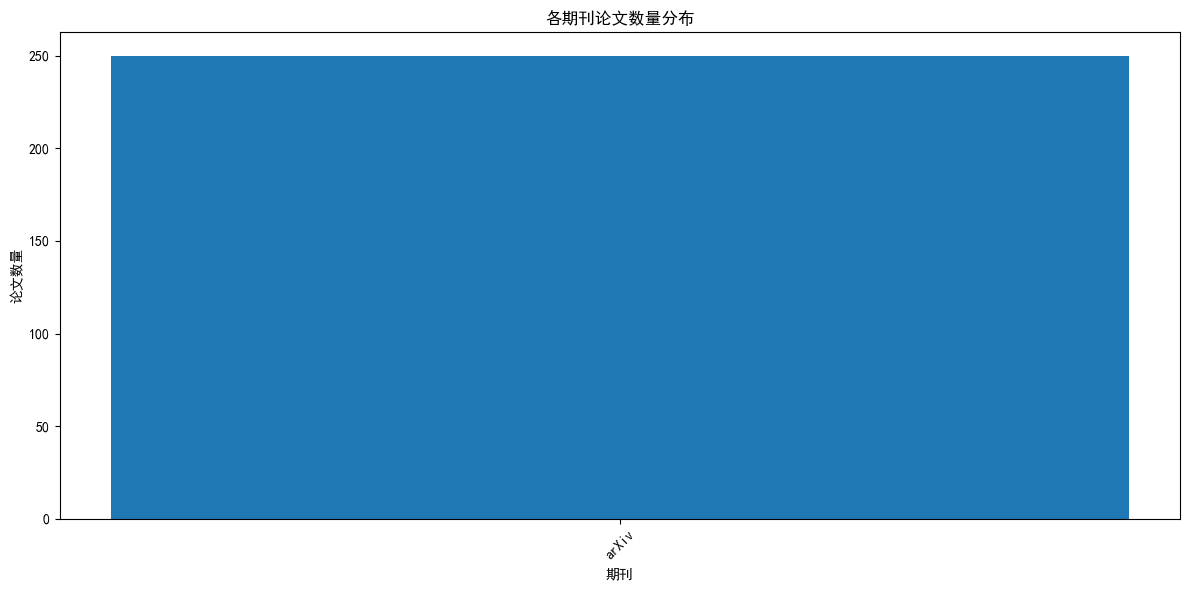

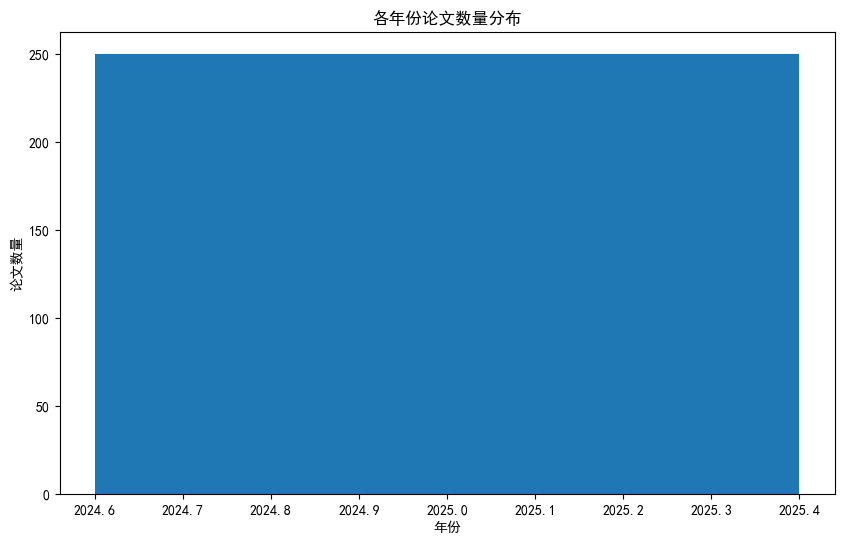

In [27]:
# 第四个单元格：数据探索和可视化（保持不变）
print("📈 基本统计信息:")
print(df[['citation_count', 'reference_count']].describe())

# 期刊分布
plt.figure(figsize=(12, 6))
journal_counts = df['journal'].value_counts()
plt.bar(journal_counts.index, journal_counts.values)
plt.title('各期刊论文数量分布')
plt.xlabel('期刊')
plt.ylabel('论文数量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 年份分布
plt.figure(figsize=(10, 6))
year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title('各年份论文数量分布')
plt.xlabel('年份')
plt.ylabel('论文数量')
plt.show()